In [1]:
import sys

In [2]:
sys.path.append('..')

In [3]:
from nbhd import data

Initializing database connection...
Database connected!


In [4]:
db = data.Base()

In [5]:
from nbhd.geography import Neighbourhood

In [6]:
n = Neighbourhood()

Getting data took 0 minutes, 0 seconds.


In [28]:
n.get_communities( footprint_threshold=250, 
                    res_length_threshold=50, 
                    short_threshold=50, 
                    min_community_size=10, 
                    node_distance=20)

In [102]:
from math import atan

In [9]:
import geopandas as gpd

In [10]:
import matplotlib.pyplot as plt

float division by zero
(339491.0, 391787.0),(339491.0, 391721.0)
float division by zero
(337847.0, 391434.0),(337847.0, 391434.0)
float division by zero
(339282.0, 391813.0),(339282.0, 391935.0)


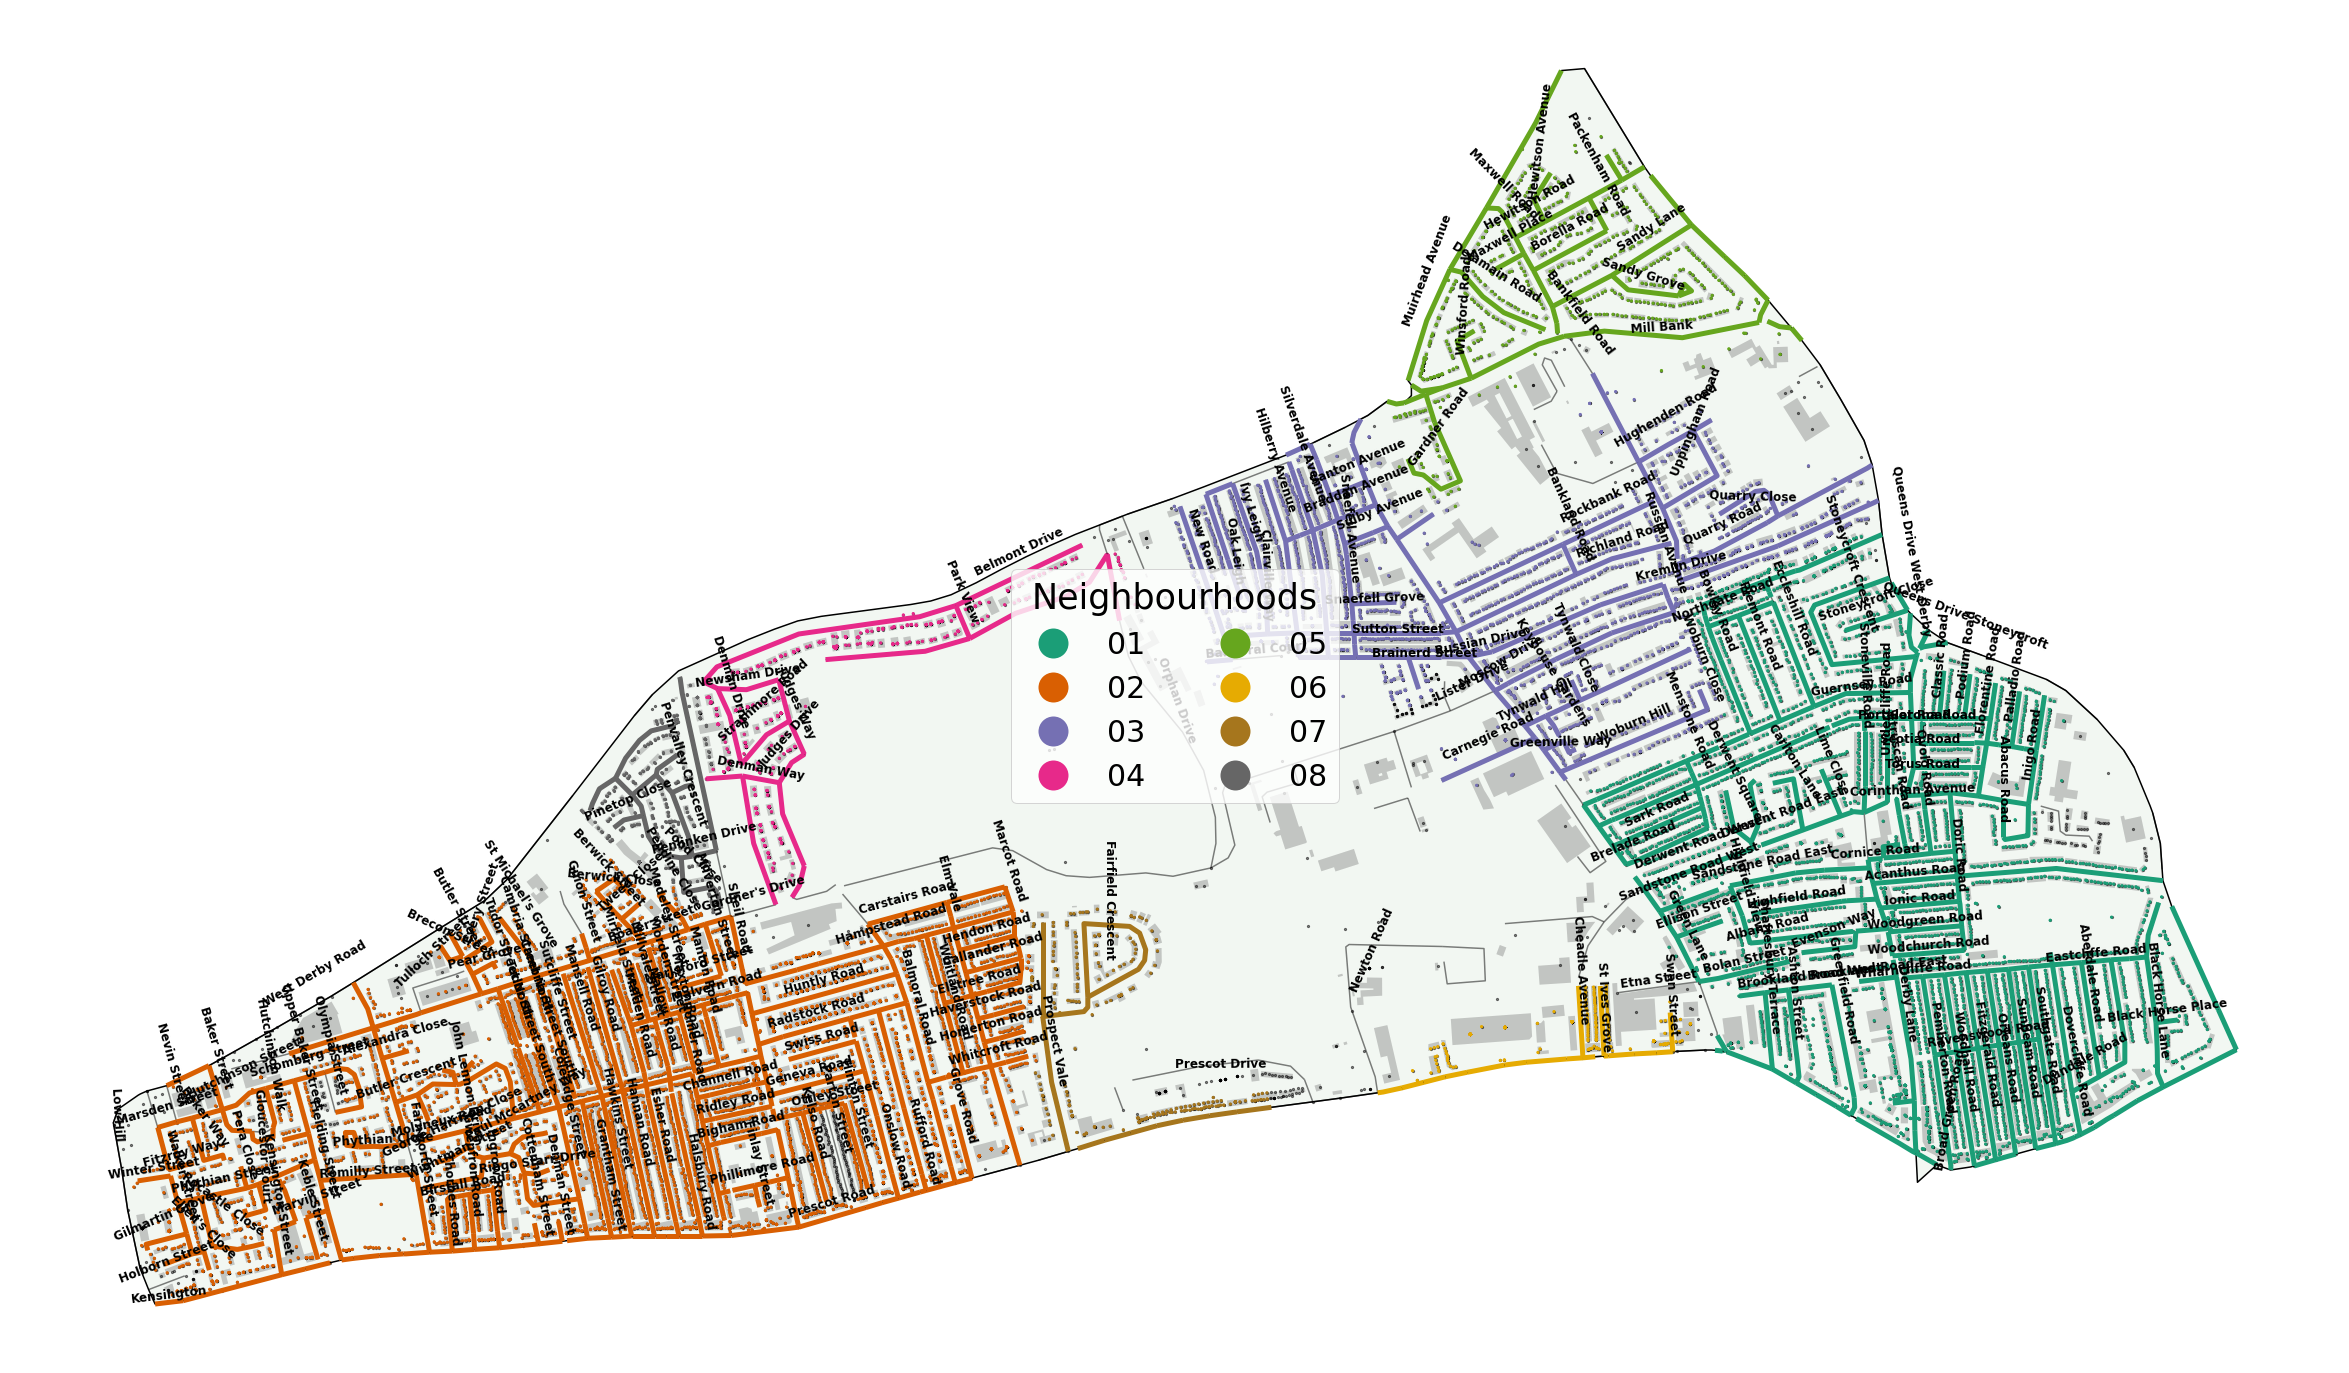

In [199]:
_fig, ax = plt.subplots(figsize=(50,25))
cmap='Dark2'
gpd.GeoDataFrame(geometry=gpd.GeoSeries(n.geom)).plot(ax=ax, color='darkgreen', alpha=0.05)
n.boundary.plot(ax=ax, linewidth=1.5, color='k')
bdg_df = n.df[~n.df[['id_building']].duplicated()][['community', 'geometry_building']]
street_df = n.df[~n.df[['id_street']].duplicated()][['community', 'geometry_street']]
gpd.GeoDataFrame(bdg_df[['community']], 
                 geometry=gpd.GeoSeries(bdg_df.geometry_building)).plot(
    color='k', ax=ax, markersize=1, alpha=0.2)
gpd.GeoDataFrame(n.df[['community']], 
                 geometry=gpd.GeoSeries.from_wkb(n.df.uprn_geometry)).plot(
    color='k', ax=ax, markersize=5, alpha=0.5)

gpd.GeoDataFrame(street_df[['community']], 
                 geometry=gpd.GeoSeries(street_df.geometry_street)).plot(
     color='k', ax=ax, markersize=5, alpha=0.5)

gpd.GeoDataFrame(street_df[['community']], 
                 geometry=gpd.GeoSeries(street_df.geometry_street)).plot(
    'community', cmap=cmap, ax=ax, linewidth=5, alpha=1)

gpd.GeoDataFrame(n.df[['community']], 
                 geometry=gpd.GeoSeries.from_wkb(n.df.uprn_geometry)).plot(
    'community', ax=ax, markersize=5, cmap=cmap, alpha=1, legend=True, legend_kwds={'fontsize':30, 
                                                                                      'markerscale':3,
                                                                                      'loc':'center',
                                                                                     'title': 'Neighbourhoods',
                                                                                     'title_fontsize':35,
                                                                                     'markerfirst': True,
                                                                                     'ncol':2})

for i in range(len(road_names)):
    road = road_names.iloc[i]
    line = list(road.geometry_street.coords)
    point1 = line[0]
#     print(point1)
    point2 = line[-1]
#     print(point2)
    try:
        rotation = atan((point2[1] - point1[1])/(point2[0]-point1[0]))* (180/math.pi)
    except Exception as e:
        print(e)
        print(f'{point1},{point2}')
        if point2[1] > point1[1]:
            rotation = 90  
        else: rotation = -90
    ax.text(road.geometry_street.centroid.x, road.geometry_street.centroid.y, road.name1,
            weight='bold', ha='center', rotation=rotation, size='large')

    
plt.axis('off')
t = time()
plt.savefig(f'save_fig/{t}.png', facecolor='white', transparent=False)

In [196]:
from time import time

In [180]:
names = db.contains('opennames', n.geom)

In [182]:
list(names.DISTRICT_BOROUGH.unique())

['Liverpool']

In [187]:
list(names.REGION.unique())

['North West']

In [186]:
list(names.COUNTRY.unique())

['England']

In [188]:
p = n.geom.representative_point()

In [191]:
p.x, p.y

(338335.88310994895, 391991.475)

In [194]:
n.roads.loc[n.roads.roadFunction.apply(lambda x: x in ('Motorway', 'A Road'))].roadClassificationNumber.unique()

array(['A5058', 'A5049', 'A5089', 'A57', 'A580', 'A5047'], dtype=object)

In [57]:
areas = names.loc[names.LOCAL_TYPE.apply(lambda x: x in ('Named Road'))].copy()

In [121]:
areas = names.loc[names.TYPE == 'populatedPlace']

In [151]:
areas.columns

Index(['ID', 'NAMES_URI', 'NAME1', 'NAME1_LANG', 'NAME2', 'NAME2_LANG', 'TYPE',
       'LOCAL_TYPE', 'MOST_DETAIL_VIEW_RES', 'LEAST_DETAIL_VIEW_RES',
       'MBR_XMIN', 'MBR_YMIN', 'MBR_XMAX', 'MBR_YMAX', 'POSTCODE_DISTRICT',
       'POSTCODE_DISTRICT_URI', 'POPULATED_PLACE', 'POPULATED_PLACE_URI',
       'POPULATED_PLACE_TYPE', 'DISTRICT_BOROUGH', 'DISTRICT_BOROUGH_URI',
       'DISTRICT_BOROUGH_TYPE', 'COUNTY_UNITARY', 'COUNTY_UNITARY_URI',
       'COUNTY_UNITARY_TYPE', 'REGION', 'REGION_URI', 'COUNTRY', 'COUNTRY_URI',
       'RELATED_SPATIAL_OBJECT', 'SAME_AS_DBPEDIA', 'SAME_AS_GEONAMES',
       'geometry'],
      dtype='object')

In [156]:
names.DISTRICT_BOROUGH.unique()

array(['Liverpool'], dtype=object)

In [160]:
names.REGION.unique()

array(['North West'], dtype=object)

In [161]:
names.COUNTRY.unique()

array(['England'], dtype=object)

In [162]:
names.RELATED_SPATIAL_OBJECT.unique()

array([None, 'osgb4000000013398483', 'osgb4000000015865478'], dtype=object)

In [112]:
names.L

array(['Suburban Area', 'Other Settlement', 'Postcode', 'Named Road',
       'Section Of Numbered Road', 'Numbered Road',
       'Special Needs Education', 'Primary Education',
       'Medical Care Accommodation', 'Secondary Education'], dtype=object)

In [88]:
road_names = n.df.loc[~n.df.name1.duplicated()].copy()

In [89]:
road_names.index

Int64Index([    0,    24,    26,    84,    90,    96,   117,   156,   204,
              205,
            ...
             9273,  9274,  9283,  9365,  9392,  9790, 11548, 12031, 12524,
            12541],
           dtype='int64', length=248)

In [73]:
road_names

In [73]:
line = road_names.geometry_street[24]

In [78]:
point1 = list(line.coords)[0]

In [79]:
point2 = list(line.coords)[-1]

In [81]:
point1

(339614.0, 391264.0)

In [86]:
from math import asin
from math import pi

33.437045429915415

In [56]:
names = n.db.contains('opennames', n.geom.buffer(2).wkt)

In [44]:
names.columns

Index(['ID', 'NAMES_URI', 'NAME1', 'NAME1_LANG', 'NAME2', 'NAME2_LANG', 'TYPE',
       'LOCAL_TYPE', 'MOST_DETAIL_VIEW_RES', 'LEAST_DETAIL_VIEW_RES',
       'MBR_XMIN', 'MBR_YMIN', 'MBR_XMAX', 'MBR_YMAX', 'POSTCODE_DISTRICT',
       'POSTCODE_DISTRICT_URI', 'POPULATED_PLACE', 'POPULATED_PLACE_URI',
       'POPULATED_PLACE_TYPE', 'DISTRICT_BOROUGH', 'DISTRICT_BOROUGH_URI',
       'DISTRICT_BOROUGH_TYPE', 'COUNTY_UNITARY', 'COUNTY_UNITARY_URI',
       'COUNTY_UNITARY_TYPE', 'REGION', 'REGION_URI', 'COUNTRY', 'COUNTRY_URI',
       'RELATED_SPATIAL_OBJECT', 'SAME_AS_DBPEDIA', 'SAME_AS_GEONAMES',
       'geometry'],
      dtype='object')

In [43]:
names.LOCAL_TYPE.unique()

array(['Suburban Area', 'Other Settlement', 'Postcode', 'Named Road',
       'Section Of Numbered Road', 'Numbered Road',
       'Special Needs Education', 'Primary Education',
       'Medical Care Accommodation', 'Secondary Education'], dtype=object)